In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [5]:
import matplotlib.pyplot as plt

In [17]:
from sklearn.metrics import accuracy_score

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

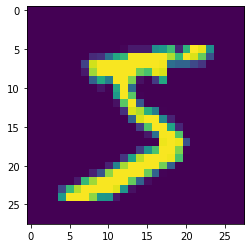

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test=X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [13]:
model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2090 - val_loss: 0.1310
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0870 - val_loss: 0.0936
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0562 - val_loss: 0.1000
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0436 - val_loss: 0.0896
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0311 - val_loss: 0.0879
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0286 - val_loss: 0.1031
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0218 - val_loss: 0.1016
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0203 - val_loss: 0.0969
Epoch 9/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0172 - val_loss: 0.1132
Epoch 10/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.017

In [15]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
y_pred=y_prob.argmax(axis=1)

In [18]:
accuracy_score(y_test, y_pred)

0.9798